## Data Exploration

In [1]:
import sqlite3
import pandas as pd
# connect to db
def build_db_and_get_name_and_tables(db_path):
    '''
    INPUT - db_path - location to load db, ex) ./binance_future_1m.db
            
    OUTPUT - 
            table_names - list of table names in the db
            table_list - list of actual table values in the db
    '''
    db = sqlite3.connect(db_path)
    cursor = db.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    table_names = cursor.fetchall()
    table_list = [pd.read_sql_query("SELECT * from %s" % name[0], db) for name in table_names]
    return table_names, table_list

table_names, table_list = build_db_and_get_name_and_tables("./binance_futures_1d.db" )


In [2]:
df = pd.DataFrame(table_list[0])
df.index = pd.to_datetime(df.timestamp, unit='ms')
df.head()

,timestamp,open,high,low,close,volume
timestamp,,,,,,
2017-08-17,1502928000000,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060


In [3]:
df.tail()

,timestamp,open,high,low,close,volume
timestamp,,,,,,
2021-12-26,1640476800000,50399.67,51280.00,49412.00,50775.49,22569.88914
2021-12-27,1640563200000,50775.48,52088.00,50449.00,50701.44,28779.58212
2021-12-28,1640649600000,50701.44,50704.05,47313.01,47543.74,45853.33924
2021-12-29,1640736000000,47543.74,48139.08,46096.99,46464.66,39498.87000
2021-12-30,1640822400000,46464.66,46844.80,45900.00,46701.51,2921.69563


In [4]:
df.describe()

,timestamp,open,high,low,close,volume
count,1.597000e+03,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000
mean,1.571875e+12,17383.815698,17907.796512,16786.053538,17410.478835,50357.535862
std,3.984409e+10,17261.002134,17763.220800,16676.735794,17273.539609,36369.638655
min,1.502928e+12,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,1.537402e+12,6732.970000,6890.510000,6566.770000,6734.100000,28451.969138
50%,1.571875e+12,9278.880000,9458.640000,9072.000000,9288.340000,43475.380377
75%,1.606349e+12,18413.880000,18948.660000,17740.040000,18541.280000,64647.809129
max,1.640822e+12,67525.820000,69000.000000,66222.400000,67525.830000,402201.673764


/home/jeffrey/anaconda3/envs/gpu/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

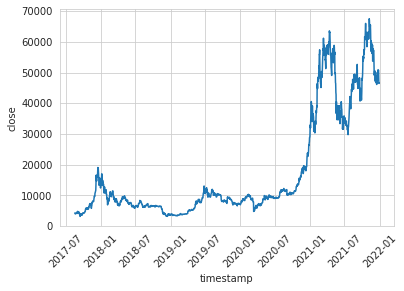

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
# basic visualization : price trend across the time
sns.lineplot(df.index, df.close)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)


/home/jeffrey/anaconda3/envs/gpu/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volume', ylabel='Density'>

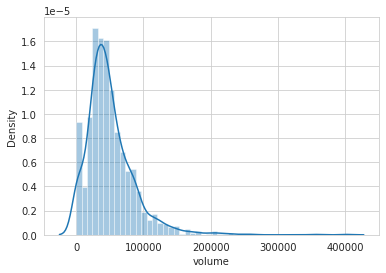

In [6]:
# volume density plot

# sns.kdeplot(df.volume, bw=0.5)
sns.distplot(df.volume)


/home/jeffrey/anaconda3/envs/gpu/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volume', ylabel='Density'>

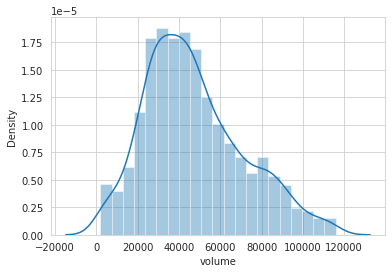

In [7]:
# seems volume is highly skewed. Let's remove lower 5%, higher 5% data to get more ideas.
n = df.shape[0]
data = df.volume.sort_values()[int(n * 0.05):int(n * 0.95)]
sns.distplot(data)

volume data seems more balanced after normalizing.

We should do some preprocessing when using this data to prevent model confusion

In [19]:
# train-test split
split_ratio = 0.8
cut = int(len(df) * split_ratio)

train_df = df[:cut]
test_df = df[cut:]

In [25]:
test_df.head()

,timestamp,open,high,low,close,volume
timestamp,,,,,,
2021-02-14,1613260800000,47156.78,49707.43,47014.17,48577.79,73735.475533
2021-02-15,1613347200000,48580.47,49010.92,45570.79,47911.10,79398.156784
2021-02-16,1613433600000,47911.10,50689.18,47003.62,49133.45,88813.266298
2021-02-17,1613520000000,49133.45,52618.74,48947.00,52119.71,85743.637818
2021-02-18,1613606400000,52117.67,52530.00,50901.90,51552.60,60758.046954


In [35]:
for idx, (timestamp, open, high, low, close, volume) in test_df.iterrows():
    print(timestamp, open, high, low, close, volume)
    break

1613260800000.0 47156.78 49707.43 47014.17 48577.79 73735.475533


In [39]:
# save train data
db = sqlite3.connect("binance_futures_1d_train.db")
table_name = '_BTCUSDT'
db.execute(f"""
        CREATE TABLE IF NOT EXISTS {table_name} (
            timestamp int, 
            open float, 
            high float, 
            low float, 
            close float, 
            volume float
        )""")
 # save to db
for idx, (timestamp, open, high, low, close, volume) in train_df.iterrows():
    db.execute(f"""
    INSERT INTO {table_name} VALUES (
        {timestamp}, {open}, {high}, {low}, {close}, {volume}
    )""")

db.commit()

In [38]:
# save test_data
db = sqlite3.connect("binance_futures_1d_test.db")
table_name = '_BTCUSDT'
db.execute(f"""
        CREATE TABLE IF NOT EXISTS {table_name} (
            timestamp int, 
            open float, 
            high float, 
            low float, 
            close float, 
            volume float
        )""")
 # save to db
for idx, (timestamp, open, high, low, close, volume) in test_df.iterrows():
    db.execute(f"""
    INSERT INTO {table_name} VALUES (
        {timestamp}, {open}, {high}, {low}, {close}, {volume}
    )""")

db.commit()